In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip


In [31]:
pd.options.display.max_rows = 999
train=pd.read_csv('../input/mercedes-benz-greener-manufacturing/train.csv.zip')
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [32]:
print(train.isnull().sum())

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
X39     0
X40     0
X41     0
X42     0
X43     0
X44     0
X45     0
X46     0
X47     0
X48     0
X49     0
X50     0
X51     0
X52     0
X53     0
X54     0
X55     0
X56     0
X57     0
X58     0
X59     0
X60     0
X61     0
X62     0
X63     0
X64     0
X65     0
X66     0
X67     0
X68     0
X69     0
X70     0
X71     0
X73     0
X74     0
X75     0
X76     0
X77     0
X78     0
X79     0
X80     0
X81     0
X82     0
X83     0
X84     0
X85     0
X86     0
X87     0
X88     0
X89     0
X90     0
X91     0
X92     0
X93     0
X94     0
X95     0
X96     0
X97     0
X98     0
X99     0
X100    0
X101    0


1. 각 칼럼이 문자형임 
2. 결측치는 없음 
3. 칼럼이 카테고리형임
4. 회귀 문제임. 속도 체크하는거니까 
5. 기종에 따라 속도가 얼마나 빠른지 예측 
* 대부분은 트리 모델이다.. 특정 칼럼에 대한 비선형적인 정보
* x 커지면 y 커진다 -> 선형적이다. 
* 비선형적, 복잡한 컬럼, 튀는 거 -> 트리 모델을 사용해야한다. 
* 워낙 숫자적인 느낌이 강한 칼럼이 많으면, housing price 상관관계가 높았다.
6. 트리모델 xgboost catboost
7. 트리모델이라서 아웃라이어 안지워도 된다 다시 또 기억 기억
8. 칼럼에 관한 정보가 부족한 데이터 -> 전처리에 신경쓰는거보다는 모델링에 신경을 써야 한다. 모델이 알아서 칼럼에 관한 정보를 잘 잡아줄 수 있도록, 옵션 정보 
9. 모델개선

In [33]:
train['X11']

0       0
1       0
2       0
3       0
4       0
       ..
4204    0
4205    0
4206    0
4207    0
4208    0
Name: X11, Length: 4209, dtype: int64

In [34]:
test=pd.read_csv('../input/mercedes-benz-greener-manufacturing/test.csv.zip')

In [35]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
sub=pd.read_csv('../input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip')
sub

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318
...,...,...
4204,8410,100.669318
4205,8411,100.669318
4206,8413,100.669318
4207,8414,100.669318


In [37]:
train.corr()['y'].sort_values()

X127   -0.510620
X232   -0.379629
X29    -0.379629
X279   -0.379629
X76    -0.368177
X54    -0.368177
X328   -0.366220
X276   -0.359254
X162   -0.355876
X272   -0.350868
X313   -0.330960
X166   -0.330925
X250   -0.298779
X178   -0.287024
X316   -0.259919
X378   -0.258679
X234   -0.258604
X28    -0.250288
X185   -0.244757
X348   -0.238914
X80    -0.238037
X108   -0.218534
X286   -0.218326
X128   -0.216763
X371   -0.215375
X304   -0.213190
X159   -0.207626
X111   -0.200016
X101   -0.197174
X43    -0.195141
X148   -0.189682
X61    -0.189109
X98    -0.186999
X120   -0.185480
X274   -0.173413
X215   -0.170424
X19    -0.168895
X273   -0.162768
X157   -0.160025
X382   -0.159815
X17    -0.159815
X256   -0.146289
X325   -0.136575
X46    -0.135958
X229   -0.128867
X301   -0.126139
X115   -0.119254
X169   -0.113981
X132   -0.113593
X350   -0.103096
X209   -0.100951
X20    -0.095148
X22    -0.094320
X158   -0.092401
X310   -0.090639
X35    -0.086976
X31    -0.086976
X37    -0.086976
X144   -0.0806

In [38]:
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [61]:
# all_data=pd.concat([train,test])

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c=train.columns[train.dtypes==object] 
for i in c:
    train[i]=le.fit_transform(list(train[i]))  
    print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [40]:
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c=test.columns[test.dtypes==object] 
for i in c:
    test[i]=le.fit_transform(list(test[i]))  
    print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [42]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6,9,17,5,3,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42,1,8,3,3,1,9,24,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47,23,17,5,3,1,3,22,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7,23,17,0,3,1,2,16,0,...,0,0,1,0,0,0,0,0,0,0


1. train셋에 id 는 섞여있음 + 숫자적인 칼럼이네 
2. 변수 중요도가 ID가 가장 높게 나옴 

In [54]:
train2=train.drop(columns=['y'])
train2

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,8,20,16,2,3,0,3,16,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,31,16,40,3,3,0,7,7,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,8,23,38,0,3,0,6,4,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,9,19,25,5,3,0,11,20,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# from sklearn.linear_model import Ridge
# Rg=Ridge(alpha=50) #특정 칼럼에 더 가중치를 주기 , 선형 모델은 옵션을 하나 정도만 있어도 
# Rg.fit(train2,np.log(train['y'])) #로그 취했으니까 예측 시 값이 로그 값으로 나옴
# result=Rg.predict(test2)

train셋에서 도움되던게 test셋에 도움이 안될 수 있다. 서로의 분포가 다를 수 있다. 오히려 학습을 대충, 중요한 칼럼들만 가지고, 질문 많이 안 던지는게 오히려 나을 수도 있다. 

In [63]:
from xgboost import XGBRegressor
xgb=XGBRegressor(learning_rate=0.1,max_depth=3,colsample_bytree=0.5)# 넣어놓기만하면 최적화되니까
#max_depth= 하나의 나무가 얼마나 많은 질문을 던지는건가,가지치기를 얼마나 하나유, 가끔 질문을 조금 하는게 나을 때가 있다.원래는 6이 디폴트  
xgb.fit(train2,train['y'])
result=xgb.predict(test)
result


array([ 90.19833 , 106.1038  ,  87.253296, ...,  93.7094  , 110.28485 ,
        95.57759 ], dtype=float32)

In [46]:
# from lightgbm import LGBMRegressor
# lgb=LGBMRegressor(colsample_bytree=0.8) 
# lgb.fit(train2,np.log(train['y']))
# result=lgb.predict(test2)
# result

array([4.33772652, 4.53432486, 4.36151358, ..., 4.52785952, 4.6986594 ,
       4.52966898])

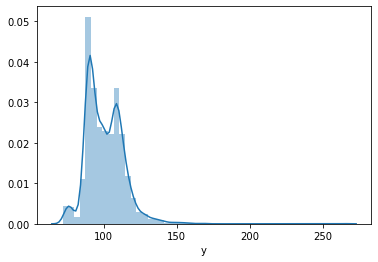

In [47]:
# import seaborn as sns 
# sns.distplot(train['y'])

In [48]:
# from sklearn.model_selection import cross_val_score
# np.sqrt(-cross_val_score(Rg,train2,train['y'],cv=10,n_jobs=-1,scoring='neg_mean_squared_error').mean()) 

In [49]:
# for i in [10,20,30,50,100,200,300,500,700,1000]:
#     r_cv=Ridge(alpha=i)
#     score=np.sqrt(-cross_val_score(r_cv,train2,train['y'],cv=10,n_jobs=-1,scoring='neg_mean_squared_error').mean())
#     print(i,score)

In [56]:
sub=pd.read_csv('../input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip')

In [57]:
sub

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318
...,...,...
4204,8410,100.669318
4205,8411,100.669318
4206,8413,100.669318
4207,8414,100.669318


In [64]:
sub['y']=(result)
sub

,ID,y
0,1,90.198334
1,2,106.103798
2,3,87.253296
3,4,78.765778
4,5,112.047188
...,...,...
4204,8410,103.172607
4205,8411,93.606621
4206,8413,93.709396
4207,8414,110.284851


In [59]:
sub.to_csv('benz5.csv',index=0)